# Work description

CentraleSupélec - Unicersité Paris-Saclay

ST4 - Resilience

__EDF Project - 10/06/2022__

GROUP 7

         Ana Luíza HAAS BEZERRA     ana-luiza.bezerra@student-cs.fr

         Klaus HOLLER               klaus.holler@student-cs.fr

         Lucas FONSECA PITTA        lucas.fonseca-pitta@student-cs.fr
         
         Lawson OLIVEIRA LIMA       lawson.oliveira@student-cs.fr

In this booklet we present the steps and procedures adopted to determine the ideal size of a dam in order to protect a industrial facility located in the berge of a river from possible flooding.

According to the project description, three different approaches are analyzed.

All decisions made and results obtained are discussed in their respective places.

# 1. First approach

Determination of the dike height from historical measurements

* Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
#from sympy import Symbol
import copy as cp
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

* Read dataset

In [2]:
data=pd.read_excel("./Dataset/Flow_history.xls")
data=pd.DataFrame(np.array(data),columns=['Year','Flow','Height'])

# Data with all year/flow/height (height=NaN included)
data["Year"]=data["Year"].to_numpy().astype(int)
data_year= data["Year"].to_numpy().astype(int)
data_flow = data["Flow"].to_numpy()
data_height = data["Height"].to_numpy()

# Data with all year/flow/height (height=NaN not included)
data2 = data.dropna(axis='rows')
data2["Year"]=data2["Year"].to_numpy().astype(int)
data_year2= data2["Year"].to_numpy().astype(int)
data_flow2= data2["Flow"].to_numpy()
data_height2 = data2["Height"].to_numpy()
print(data.describe())


              Year         Flow      Height
count   149.000000   149.000000  123.000000
mean   1923.000000  1335.419913    3.896748
std      43.156691   713.926746    1.272337
min    1849.000000   122.435600    1.000000
25%    1886.000000   799.918835    3.100000
50%    1923.000000  1256.402143    3.900000
75%    1960.000000  1694.929723    4.750000
max    1997.000000  3853.892756    7.200000


C:\Users\Klaus\AppData\Local\Temp\ipykernel_10804\4207350783.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["Year"]=data2["Year"].to_numpy().astype(int)


### 1.1 Data visualisation

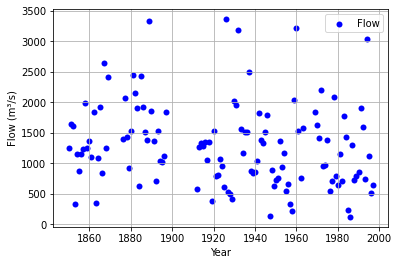

In [3]:
#plot year vs flow data without Nan
plt.figure()
plt.scatter(data_year2, data_flow2, color="blue", label="Flow",linewidths=0.0001)
plt.legend()
plt.grid(axis="both")
plt.xlabel("Year")
plt.ylabel("Flow (m³/s)")
plt.show()

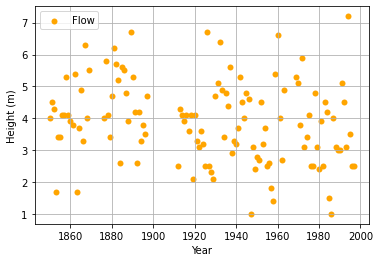

In [4]:
#plot year vs height data without Nan
plt.figure()
plt.scatter(data_year2, data_height2, color="orange", label="Flow",linewidths=0.0001)
plt.legend()
plt.grid(axis="both")
plt.xlabel("Year")
plt.ylabel("Height (m)")
plt.show()

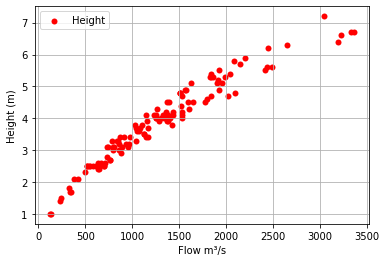

In [5]:
#plot height vs flow data without Nan
plt.figure()
plt.scatter(data_flow2, data_height2, color="red", label="Height",linewidths=0.0001)
plt.grid(axis="both")
plt.xlabel("Flow m³/s")
plt.ylabel("Height (m)")
plt.legend()
plt.show()

### 1.2 Determining missing heights

For this method we use the __polynomial regression__ of 2nd degree to estimate the missing data.

* Model

In [6]:
degree=2
model=make_pipeline(PolynomialFeatures(degree),LinearRegression())

# Training data and fitting model
x_train, x_test, y_train, y_test = train_test_split(data_flow2, data_height2, test_size=0.2, random_state=40)
x_train=x_train.reshape((-1,1))
x_test=x_test.reshape((-1,1))
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

* Estimate error

In [7]:
# Root Mean Squared Deviation
rmsd = np.sqrt(mean_squared_error(y_test, y_pred))      
r2_value = r2_score(y_test, y_pred)                     

print("Root Mean Square Error:\n", rmsd)
print("R^2 Value:\n", r2_value)

Root Mean Square Error:
 0.21994625839272286
R^2 Value:
 0.9690688257154997


* Plot error of test set

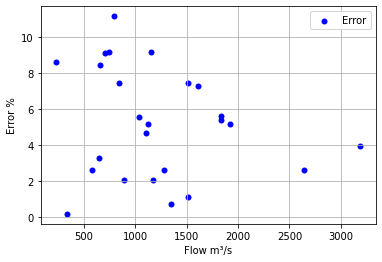

In [8]:
#Predict the output
error=abs(y_pred-y_test)

#Plot
plt.figure()
plt.scatter(x_test, 100*abs(y_pred-y_test)/y_test, color="blue", label="Error",linewidths=0.0001)
plt.grid(axis="both")
plt.xlabel("Flow m³/s")
plt.ylabel("Error %")
plt.legend()
plt.show()

* Determing missing data by polynomial regression

In [9]:
Years=np.linspace(np.min(data_year),np.max(data_year),num=((np.max(data_year)-np.min(data_year)+1))).astype(int)
Flow=cp.deepcopy(data_flow)
Height=[]
for i in Years:
    if  i not in data_year2:
        Height.append(model.predict(data_flow[i-np.min(data_year)].reshape((-1,1)))[0])
    else:
        Height.append(data_height[i-np.min(data_year)])

* Plot height set with estimated heights

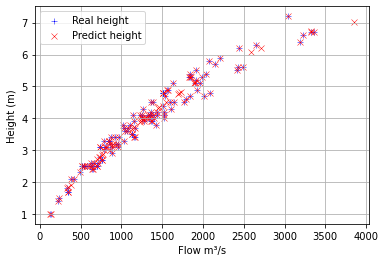

In [10]:
plt.figure()
plt.scatter(data_flow2, data_height2,marker='+',color="blue", label="Real height",linewidths=0.5)
plt.grid(axis="both")
plt.xlabel("Flow m³/s")
plt.ylabel("Height (m)")
plt.scatter(Flow, Height, marker='x',color="red", label="Predict height",linewidths=0.5)
plt.legend()
plt.show()

### 1.3 Histogram

Visualisation of the data __histogram__ with and without the estimated missing data.

Kernel density function __(KDE)__ plotted for visualisation.


c:\Users\Klaus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Klaus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


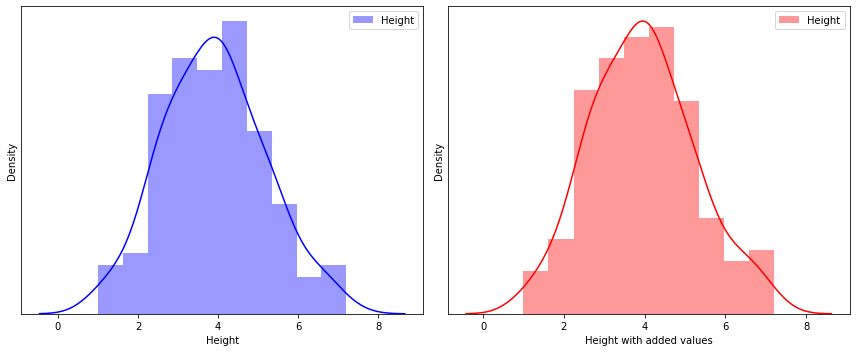

In [11]:
#Histogram plot
fig, ax = plt.subplots(1,2,figsize=(12,5))

sns.distplot(data_height2,color="blue",ax=ax[0],label='Height')
ax[0].set_yticks([])
ax[0].set_xlabel('Height')
ax[0].legend()
sns.distplot(Height,color="red",ax=ax[1],label='Height')
ax[1].set_yticks([])
ax[1].set_xlabel('Height with added values')
ax[1].legend()
plt.tight_layout()
plt.show()

### 1.4 Fitting distribution to the dataset

In this section __Weibull__, **Gumbel** and __Normal__ (Gaussian) distributions are fitted for the dataset.

For each distribution the __p-value__ is obtained using the __chi-2__ method, which is useful to validate if a parametric distribution can or cannot be used to explain a dataset. The __square error__ is also calculated.

c:\Users\Klaus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Klaus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Klaus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

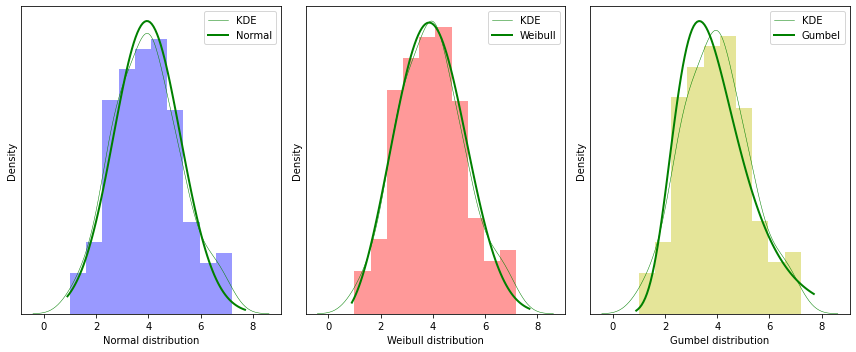

P-value - normal distribution: 0.4145942921111919
          Weibull distribution: 0.36992470653654486
          Gumbel distribution: 0.6419136297156044
Square error - normal distribution: 118.80468345382576
               Weibull distribution: 111.2205176082584
               Gumbel distribution: 152.33726732941278


In [12]:
emp_mean = np.mean(Height)
emp_stand_dev = np.std(Height)

#Tx = constant of the rejection region from the chi-2 test
Tx=[0,0,0] 
errors=[0,0,0]

#P-value and error of normal distribution using chi-2
n=15
df=n-2-1

hist_values = np.linspace(0.9,7.7,n)
hist_norm_cdf = scp.stats.norm.cdf(hist_values,loc=emp_mean,scale=emp_stand_dev)
hist = np.zeros(n)

hist_norm = np.zeros(n)
for i in range(len(hist_values)-1):
    hist[i]=np.count_nonzero((Height<hist_values[i+1]) & (Height>=hist_values[i]))
    hist_norm[i]=(hist_norm_cdf[i+1]-hist_norm_cdf[i])*149
    Tx[0] += (hist[i]-hist_norm[i])**2/hist_norm[i]
    errors[0]+=(hist[i]-hist_norm[i])**2

#P-value and error of Weibull distribution using chi-2
weibull_cste = scp.stats.weibull_min.fit(Height)
hist_wei_cdf = scp.stats.weibull_min.cdf(hist_values,weibull_cste[0],weibull_cste[1],weibull_cste[2])
hist2 = np.zeros(n)
hist_wei = np.zeros(n)
for i in range(len(hist_values)-1):
    hist2[i]=np.count_nonzero((Height<hist_values[i+1]) & (Height>=hist_values[i]))
    hist_wei[i]=(hist_wei_cdf[i+1]-hist_wei_cdf[i])*149
    Tx[1] += (hist2[i]-hist_wei[i])**2/hist_wei[i]
    errors[1] += (hist2[i]-hist_wei[i])**2

#P-value and error of Gumbel distribution using chi-2
gumbel_cste = scp.stats.gumbel_r.fit(Height)
hist_gum_cdf = scp.stats.gumbel_r.cdf(hist_values,gumbel_cste[0],gumbel_cste[1])
hist3 = np.zeros(n)
hist_gum = np.zeros(n)
for i in range(len(hist_values)-1):
    hist3[i]=np.count_nonzero((Height<hist_values[i+1]) & (Height>=hist_values[i]))
    hist_gum[i]=(hist_gum_cdf[i+1]-hist_gum_cdf[i])*149
    Tx[2] += (hist3[i]-hist_gum[i])**2/hist_gum[i]
    errors[2] += (hist3[i]-hist_gum[i])**2

#Plot of the histograms with the fitted distribution
x=np.linspace(0.9,7.7,100)
fig, ax = plt.subplots(1,3,figsize=(12,5))

#Plot normal distribution
sns.distplot(Height,ax=ax[0],color='b',kde_kws={"color": "g", "lw": 0.5, "label": "KDE"})
ax[0].plot(x,scp.stats.norm.pdf(x,emp_mean,emp_stand_dev),\
         lw=2,label='Normal',color='g')
ax[0].set_yticks([])
ax[0].set_xlabel('Normal distribution')
ax[0].legend()

#Plot Weibull distribution
sns.distplot(Height,ax=ax[1], color='r',kde_kws={"color": "g", "lw": 0.5, "label": "KDE"})
ax[1].plot(x,scp.stats.weibull_min.pdf(x,weibull_cste[0],weibull_cste[1],weibull_cste[2]),\
         lw=2,label='Weibull', color='g')
ax[1].set_yticks([])
ax[1].set_xlabel('Weibull distribution')
ax[1].legend()

#Plot Gumbel distribution
sns.distplot(Height,ax=ax[2],color='y',kde_kws={"color": "g", "lw": 0.5, "label": "KDE"})
ax[2].plot(x,scp.stats.gumbel_r.pdf(x,gumbel_cste[0],gumbel_cste[1]),\
         lw=2,label='Gumbel', color='g')
ax[2].set_yticks([])
ax[2].set_xlabel('Gumbel distribution')
ax[2].legend()

plt.tight_layout()
plt.show()

#Print errors and p-values
print('P-value - normal distribution:', 1-scp.stats.chi2.cdf(df,Tx[0]))
print('          Weibull distribution:', 1-scp.stats.chi2.cdf(df-1,Tx[1]))
print('          Gumbel distribution:', 1-scp.stats.chi2.cdf(df,Tx[2]))
print('Square error - normal distribution:', errors[0])
print('               Weibull distribution:', errors[1])
print('               Gumbel distribution:', errors[2])


### 1.4 Determination of the dike height based on the chosed distribution

From the previous step we verify that all three distributions can describe the dataset. With an __hypothesis test__ it's clear that the p-value for all of them is high enough to keep the null hypothesis (the distribution represents the database), thus __no strong conclusion__ can be obtained from it. A valid comment is that the Gumbel distribution is the one with highest p-value, therefore the most unlikely to be discarded.

In order to obtain a stronger conclusion the square error is more adequate as an indicator of the distributions performance regarding the database. Through this procedure the Weibull distribution outstands with a lower error compared to the other distributions. Yet, this indicator still doesn't show a strong evidence of rejection for the other distributions, as the errors are on the same order of magnitude.

Taking in consideration the discussion above the __chosed distribution is Weibull__ due to its lower square error.

In this section the __quantiles of 0.95 and 0.99__ are used to determine the safety level of a dike with respect to the height of the water. This is a __Value-at-Risk (Var)__ approach.

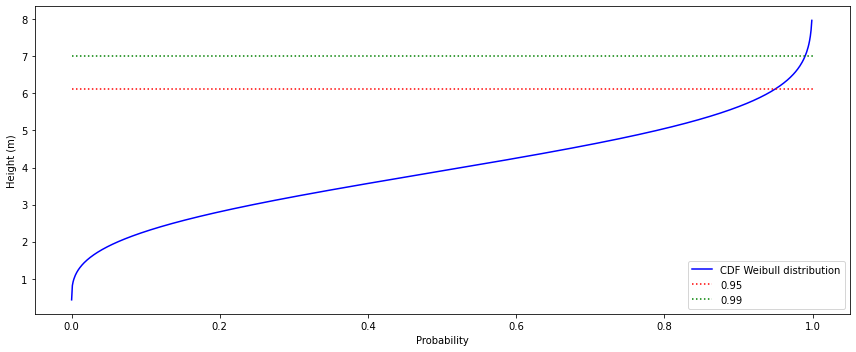

Water height for quantile 0.95: 6.1231242155636725 m
Water height for quantile 0.99: 7.009061497513449 m


In [13]:
# Plot Wiebull CDF and the chosen quantiles
y = np.linspace(0,1,1000)
plt.figure(figsize=(12,5))
plt.plot(y,scp.stats.weibull_min.ppf(y,weibull_cste[0],weibull_cste[1],weibull_cste[2]),'b',label = 'CDF Weibull distribution')
plt.plot(np.array([0, 1]), (np.array([1,1])*scp.stats.weibull_min.ppf(0.95,weibull_cste[0],weibull_cste[1],weibull_cste[2])),':r',label='0.95')
plt.plot(np.array([0, 1]), (np.array([1,1])*scp.stats.weibull_min.ppf(0.99,weibull_cste[0],weibull_cste[1],weibull_cste[2])),':g',label='0.99')
plt.xlabel('Probability')
plt.ylabel('Height (m)')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate the dike height for each quantile
print('Water height for quantile 0.95:', scp.stats.weibull_min.ppf(0.95,weibull_cste[0],weibull_cste[1],weibull_cste[2]), 'm')
print('Water height for quantile 0.99:', scp.stats.weibull_min.ppf(0.99,weibull_cste[0],weibull_cste[1],weibull_cste[2]), 'm')

### 1.5 Conclusion for the first approach

Based on the steps described above it can be said that a dike __hd = 6.12 m__ will prevent with 95% certainty the risk of flooding and a __hd = 7.01 m__ can prevent with 99% of certainty the risk of flooding. This information only takes in consideration the height of the water, not the terrain elevation.

Taking the terrain parameters in consideration we have the following equation:

__hb = H + Zv - Zb__

Where:

Zb (shoreline elevation) = 55.5 m (deterministic)

Zv (Downstream watercourse bottom elevation) = 50 m (average value of the random variable)


Based in this equation we have the following values for the dike height:

__hb = 0.62 m__ with 95% of certainty of no flooding

__hb = 1.5 m__ with 99% of certainty of no flooding